In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Leer csv
df_tiendas = pd.read_csv('/content/drive/MyDrive/2024 2Q/Proyecto Final/TP Proyecto/Entrega 3/Codigo E3/tiendas_caba_v6.csv')

Mounted at /content/drive


In [2]:
df_tiendas_sinID = df_tiendas.drop(columns=["id"])

In [ ]:
# no escalar: ['mon_open', 'tue_open', 'wed_open', 'thu_open', 'fri_open', 'sat_open', 'sun_open', 'supermercado_chino', 'supermercado', 'en_avenida','producto_1_freq', 'producto_2_freq', 'producto_3_freq', 'producto_4_freq', 'producto_5_freq', 'categoria_1_freq', 'categoria_2_freq', 'categoria_3_freq', 'categoria_4_freq', 'categoria_5_freq', 'comuna_freq', 'porc_nbi', 'porc_mujeres', 'porc_varones']

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# no se escalarán
columns_to_exclude = ['mon_open', 'tue_open', 'wed_open', 'thu_open', 'fri_open',
                       'sat_open', 'sun_open', 'supermercado_chino', 'supermercado',
                       'en_avenida', 'producto_1_freq', 'producto_2_freq',
                       'producto_3_freq', 'producto_4_freq', 'producto_5_freq',
                       'categoria_1_freq', 'categoria_2_freq', 'categoria_3_freq',
                       'categoria_4_freq', 'categoria_5_freq', 'comuna_freq',
                       'porc_nbi', 'porc_mujeres', 'porc_varones']

# columnas a escalar
columns_to_scale = df_tiendas_sinID.columns.difference(columns_to_exclude)

# Escalar
scaler = StandardScaler()
#scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(df_tiendas_sinID[columns_to_scale]), columns=columns_to_scale)

# Unir las columnas no escaladas si es necesario
x_scaled = pd.concat([x_scaled, df_tiendas_sinID[columns_to_exclude].reset_index(drop=True)], axis=1)

# Ahora x_scaled contiene las columnas escaladas y las no escaladas


In [ ]:
x_scaled.shape

(1982, 64)

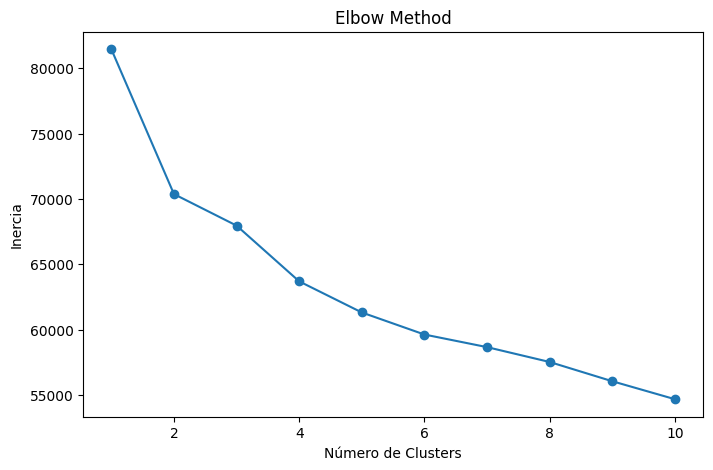

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular la inercia para diferentes números de clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

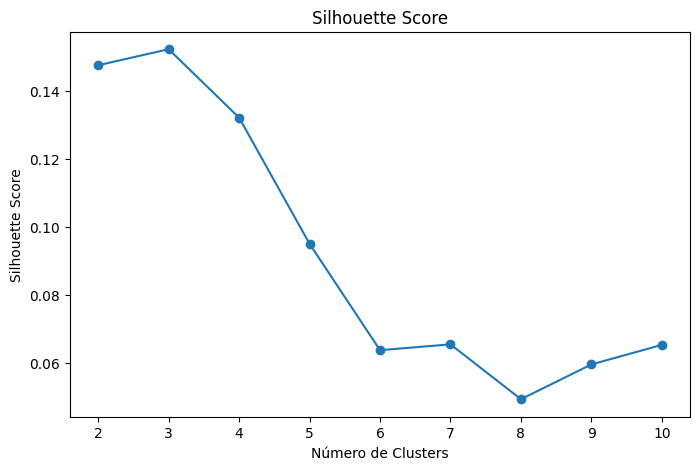

In [5]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Calcular el silhouette score para diferentes números de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    if k > 1:  # Silhouette Score solo tiene sentido para k > 1
        score = silhouette_score(x_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# Graficar el Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# PCA & Explained Variance

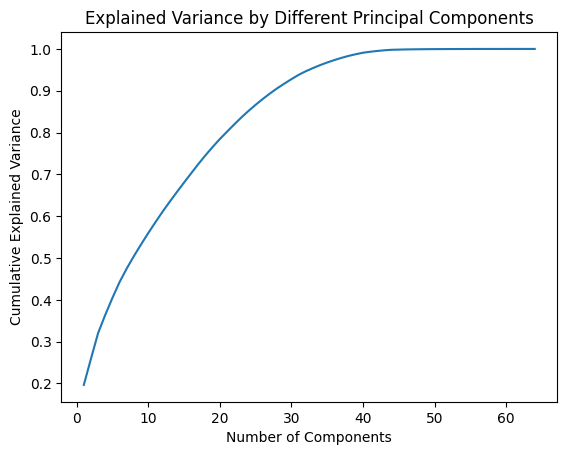

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on scaled data
pca = PCA().fit(x_scaled)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.show()

In [7]:
n_components = 3

In [8]:
from sklearn.decomposition import PCA

# Applying PCA with the optimal number of components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(x_scaled)

# The pca_result is an array with the transformed features

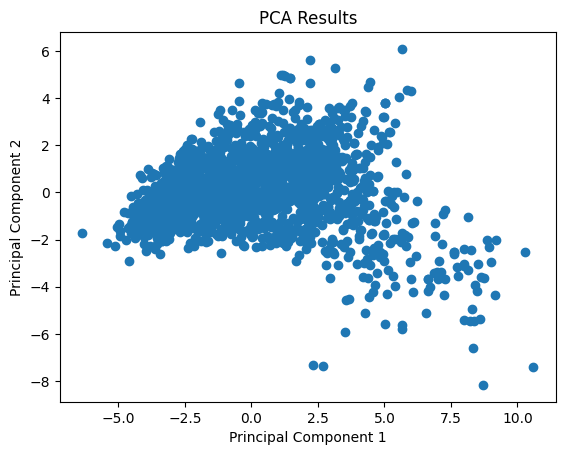

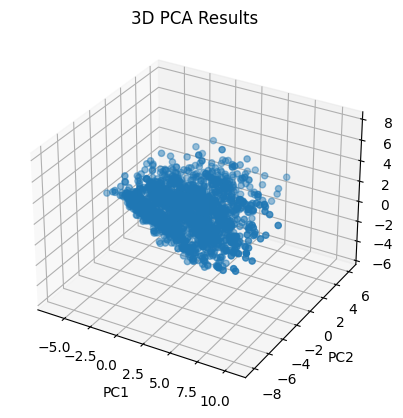

In [9]:
import matplotlib.pyplot as plt

# For a 2D plot (if n_components=2)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

# For a 3D plot (if n_components=3)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Results')
plt.show()

In [10]:
# Multiplicar cada componente por su varianza explicada
x_pca_scaled = pca_result * pca.explained_variance_ratio_

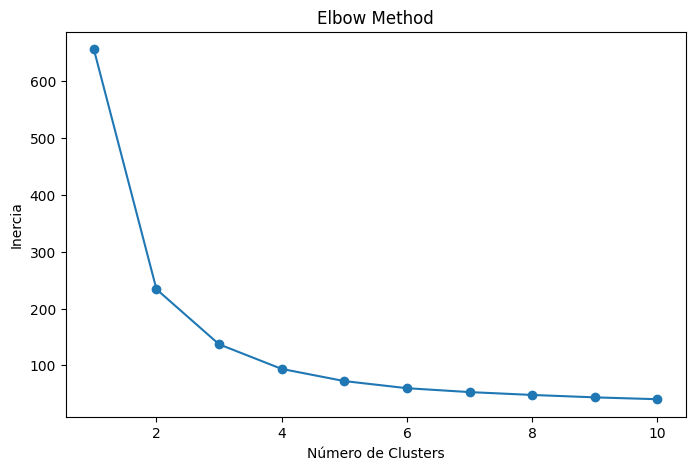

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular la inercia para diferentes números de clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# KMeans

In [12]:
from sklearn.cluster import KMeans

n_clusters = 3

# Applying KMeans clustering
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42,init='k-means++', max_iter=500, n_init=30, tol=1e-4)
kmeans_pca.fit(x_pca_scaled)

# The cluster labels for each data point
cluster_labels = kmeans_pca.labels_

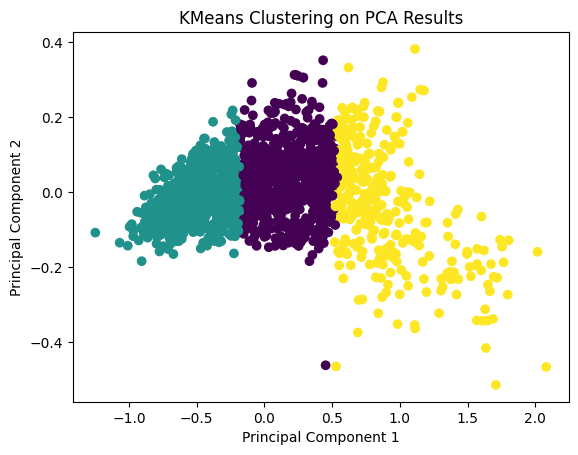

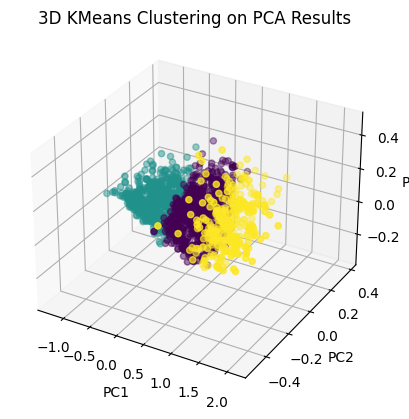

In [13]:
# 2D Visualization
plt.scatter(x_pca_scaled[:, 0], x_pca_scaled[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on PCA Results')
plt.show()

# 3D Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca_scaled[:, 0], x_pca_scaled[:, 1], x_pca_scaled[:, 2], c=cluster_labels)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D KMeans Clustering on PCA Results')
plt.show()

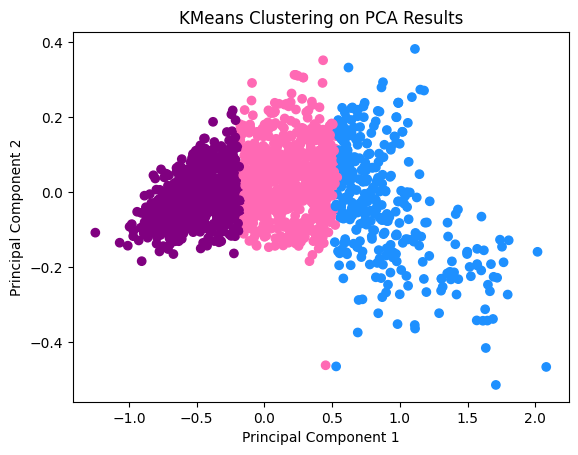

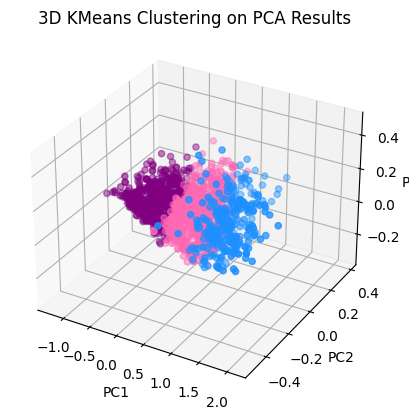

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Supongamos que tienes 'x_pca_scaled' y 'cluster_labels' ya definidos

# Definir colores para los clusters
cluster_color_map = {
    0: '#FF69B4',   # Cluster 0 (Rosa)
    1: 'purple',    # Cluster 1
    2: '#1E90FF',   # Cluster 2 (Dodger Blue)
}

# Crear una lista de colores según los labels
colors = [cluster_color_map[label] for label in cluster_labels]

# 2D Visualization
plt.scatter(x_pca_scaled[:, 0], x_pca_scaled[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on PCA Results')
plt.show()

# 3D Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca_scaled[:, 0], x_pca_scaled[:, 1], x_pca_scaled[:, 2], c=colors)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D KMeans Clustering on PCA Results')
plt.show()


In [ ]:
df_tiendas['cluster'] = kmeans_pca.fit_predict(x_pca_scaled)

In [ ]:
# coeficiente de silueta
silhouette_avg = silhouette_score(x_pca_scaled, df_tiendas['cluster'])
print(f'Coeficiente de Silueta: {silhouette_avg}')

Coeficiente de Silueta: 0.4866794534743111


In [ ]:
df_tiendas['cluster'].value_counts()

,count
cluster,
1,842
0,795
2,345


In [ ]:
df_tiendas.to_csv('tiendas_caba_v7.csv', index=False)

# Descargar el archivo CSV en tu computadora
from google.colab import files
files.download('tiendas_caba_v7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probando

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x_scaled[:, 0], x_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Probando x 2

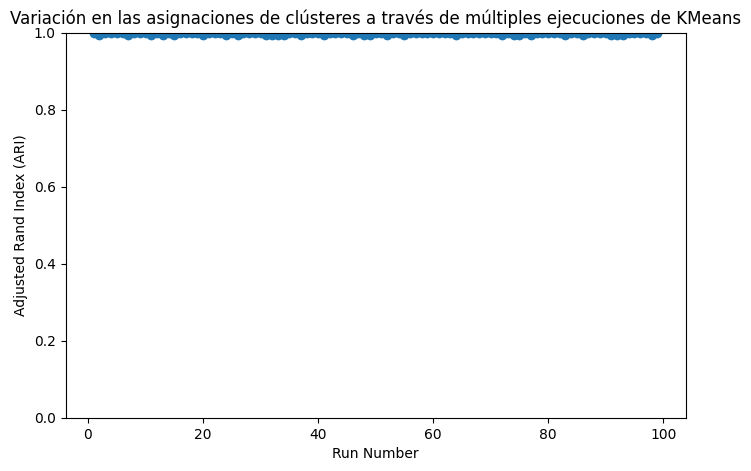

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

n_clusters = 3
n_runs = 100  # Número de corridas del algoritmo

# Para almacenar las etiquetas de cada ejecución
labels_runs = []

# Ejecutar KMeans múltiples veces sin random_state
for i in range(n_runs):
    kmeans_pca = KMeans(n_clusters=n_clusters, max_iter=500, n_init=30, tol=1e-4)
    kmeans_pca.fit(x_pca_scaled)
    labels_runs.append(kmeans_pca.labels_)

# Comparar las etiquetas de los clusters entre las diferentes ejecuciones
# Vamos a calcular la similitud entre las asignaciones de clústeres usando ARI
ari_scores = []

# Comparar la primera ejecución con todas las demás
for i in range(1, n_runs):
    ari = adjusted_rand_score(labels_runs[0], labels_runs[i])
    ari_scores.append(ari)

# Gráfico para mostrar los cambios en las asignaciones
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_runs), ari_scores, marker='o')
plt.xlabel('Run Number')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('Variación en las asignaciones de clústeres a través de múltiples ejecuciones de KMeans')
plt.ylim(0, 1)
plt.show()



# KMedianas

In [ ]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395101 sha256=40284677c2704b96f99239b531e07fa35b07a270c5d1b084300236576f8498ff
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score
import numpy as np

# Supongamos que x_scaled es tu DataFrame escalado convertido a un array de numpy
#x_pca_scaled_array = x_pca_scaled.to_numpy()

# Reiniciar el índice de df_tiendas para asegurarnos de que sea continuo
df_tiendas.reset_index(drop=True, inplace=True)

# Inicializa el centroide, elige 3 puntos aleatorios (puedes cambiarlo según tus datos)
initial_medoids = [0, 1, 2]  # Cambia estos índices a los que desees
kmedoids_instance = kmedoids(x_pca_scaled, initial_medoids)

# Ejecuta el algoritmo
kmedoids_instance.process()

# Obtiene los clusters
clusters = kmedoids_instance.get_clusters()

# Asigna los clusters a una nueva serie
cluster_assignment = np.full(x_pca_scaled.shape[0], -1)  # Inicializa con -1
for cluster_id, indices in enumerate(clusters):
    for index in indices:
        cluster_assignment[index] = cluster_id

# Asigna la serie de clusters al DataFrame original
df_tiendas['cluster_v2'] = cluster_assignment

# Verifica el tamaño después de la asignación
print("Tamaño del DataFrame después de la asignación:", df_tiendas.shape)

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(x_pca_scaled, df_tiendas['cluster_v2'])
print(f'Coeficiente de Silueta: {silhouette_avg}')


Tamaño del DataFrame después de la asignación: (1982, 66)
Coeficiente de Silueta: 0.4803316758953052


# Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Ajustar el modelo de clustering jerárquico
agglomerative = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='average')
labels = agglomerative.fit_predict(x_pca_scaled)

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(x_pca_scaled, labels)
print(f'Coeficiente de Silueta: {silhouette_avg}')


Coeficiente de Silueta: 0.2763460528089992


In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Ajustar el modelo de clustering jerárquico
agglomerative = AgglomerativeClustering(n_clusters=5, metric='manhattan', linkage='average')
labels = agglomerative.fit_predict(x_pca_scaled)

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(x_pca_scaled, labels)
print(f'Coeficiente de Silueta: {silhouette_avg}')

# Contar el número de elementos en cada cluster
unique_labels, counts = np.unique(labels, return_counts=True)
clusters_count = dict(zip(unique_labels, counts))

# Mostrar la cantidad de elementos en cada cluster
for cluster_id, count in clusters_count.items():
    print(f'Cluster {cluster_id}: {count} elementos')


Coeficiente de Silueta: 0.11666541652896266
Cluster 0: 1838 elementos
Cluster 1: 136 elementos
Cluster 2: 2 elementos
Cluster 3: 1 elementos
Cluster 4: 5 elementos
